### Libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd '/content/drive/MyDrive/Colab Notebooks/SentimentAnalysis'

/content/drive/MyDrive/Colab Notebooks/SentimentAnalysis


In [1]:
from DataPreprocessingFunction import preprocess_text
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/katebokhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#data_train = pd.read_csv('Data/data_train.csv')
#data_test = pd.read_csv('Data/data_test.csv')

#tqdm.pandas()
#data_train['Review_Text'] = data_train['Review_Text'].progress_apply(preprocess_text)

  0%|          | 0/8703 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
100%|██████████| 8703/8703 [1:37:37<00:00,  1.49it/s]


In [4]:
data_train = pd.read_csv('Data/DisneylandReviews.csv', encoding='latin1')
data_test = pd.read_csv('Data/data_test.csv')

tqdm.pandas()
data_train['Review_Text'] = data_train['Review_Text'].progress_apply(preprocess_text)
data_train.to_csv('Data/data_train_preproc_all.csv', index=False)

100%|██████████| 42656/42656 [3:49:10<00:00,  3.10it/s]      


In [7]:
data_train.to_csv('Data/data_train_preproc.csv', index=False)

In [2]:
data_train = pd.read_csv('Data/data_train_preproc_all.csv')

In [3]:
data_test = pd.read_csv('Data/data_test.csv')

tqdm.pandas()
data_test['Review_Text'] = data_test['Review_Text'].progress_apply(preprocess_text)

100%|██████████| 2175/2175 [12:36<00:00,  2.88it/s]


In [4]:
data_test.to_csv('Data/data_test_preproc.csv', index=False)

In [3]:
train_positive_preproc = data_train[data_train['Sentiment'] == 1].dropna()
train_negative_preproc = data_train[data_train['Sentiment'] == -1].dropna()
train_neutral_preproc = data_train[data_train['Sentiment'] == 0].dropna()

### NGrams Analysis

In [4]:
def get_most_common_grams(corpus, N, top_n):
    vectorizer = CountVectorizer(ngram_range=(N, N))
    ngrams = vectorizer.fit_transform(corpus)
    count = ngrams.sum(axis=0)
    grams_freq = [(word, count[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    grams_freq = sorted(grams_freq, key = lambda x: x[1], reverse=True)
    return grams_freq[:top_n]

### Unigram analysis

In [5]:
positive_top_40_unigrams = get_most_common_grams(train_positive_preproc['Review_Text'], 1, 40)

positive_top_40_unigrams

[('park', 31815),
 ('ride', 31361),
 ('go', 23763),
 ('day', 23211),
 ('time', 23167),
 ('disneyland', 20735),
 ('disney', 20665),
 ('get', 19614),
 ('not', 17000),
 ('one', 12473),
 ('visit', 12184),
 ('good', 11677),
 ('great', 11601),
 ('see', 10264),
 ('do', 10191),
 ('place', 9956),
 ('kid', 9885),
 ('take', 9443),
 ('well', 9311),
 ('love', 9041),
 ('show', 8829),
 ('wait', 8775),
 ('food', 8513),
 ('pass', 8500),
 ('would', 8428),
 ('line', 8148),
 ('year', 7976),
 ('like', 7704),
 ('parade', 7704),
 ('really', 7581),
 ('make', 7548),
 ('queue', 7530),
 ('long', 7475),
 ('enjoy', 6883),
 ('much', 6816),
 ('fun', 6718),
 ('lot', 6619),
 ('also', 6453),
 ('fast', 6237),
 ('character', 5933)]

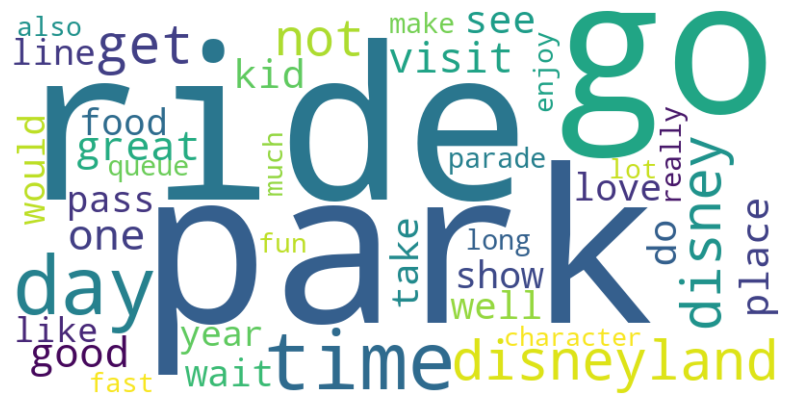

In [6]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(positive_top_40_unigrams))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
negative_top_40_unigrams = get_most_common_grams(train_negative_preproc['Review_Text'], 1, 40)

negative_top_40_unigrams

[('ride', 5025),
 ('park', 4955),
 ('disney', 3802),
 ('go', 3698),
 ('not', 3289),
 ('get', 3215),
 ('time', 2873),
 ('day', 2773),
 ('disneyland', 2502),
 ('one', 2141),
 ('queue', 2122),
 ('wait', 2037),
 ('would', 1919),
 ('people', 1812),
 ('do', 1767),
 ('line', 1729),
 ('hour', 1714),
 ('visit', 1454),
 ('see', 1453),
 ('food', 1377),
 ('minute', 1322),
 ('we', 1312),
 ('staff', 1270),
 ('place', 1268),
 ('take', 1261),
 ('year', 1245),
 ('like', 1237),
 ('well', 1236),
 ('could', 1228),
 ('even', 1228),
 ('long', 1194),
 ('kid', 1169),
 ('say', 1148),
 ('ticket', 1140),
 ('pass', 1133),
 ('close', 1117),
 ('good', 1116),
 ('child', 1109),
 ('experience', 1091),
 ('make', 1083)]

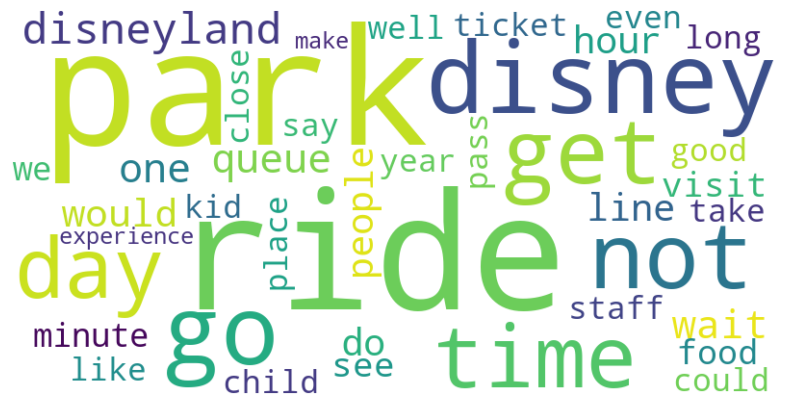

In [8]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(negative_top_40_unigrams))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
neutral_top_40_unigrams = get_most_common_grams(train_neutral_preproc['Review_Text'], 1, 40)

neutral_top_40_unigrams

[('park', 6030),
 ('ride', 5812),
 ('disney', 4465),
 ('go', 4118),
 ('not', 3977),
 ('time', 3599),
 ('get', 3399),
 ('day', 3328),
 ('disneyland', 3215),
 ('one', 2515),
 ('do', 2250),
 ('queue', 2181),
 ('would', 2171),
 ('good', 2096),
 ('visit', 2077),
 ('see', 1798),
 ('line', 1778),
 ('wait', 1774),
 ('kid', 1679),
 ('well', 1662),
 ('food', 1644),
 ('people', 1536),
 ('take', 1518),
 ('like', 1517),
 ('long', 1471),
 ('hour', 1424),
 ('year', 1389),
 ('really', 1364),
 ('place', 1349),
 ('we', 1331),
 ('much', 1319),
 ('pass', 1311),
 ('many', 1258),
 ('close', 1246),
 ('make', 1243),
 ('small', 1220),
 ('child', 1194),
 ('staff', 1181),
 ('could', 1166),
 ('show', 1153)]

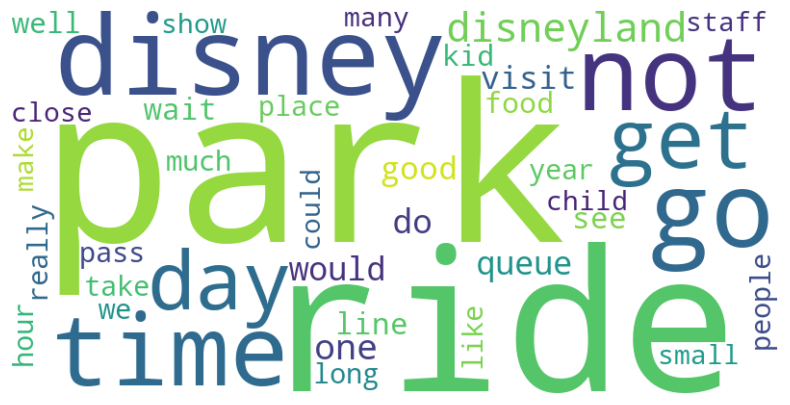

In [10]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(neutral_top_40_unigrams))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We observe that there are some words like "park", "Disney", "ride" that are popular in reviews of any sentiment. So probably BagOfWords is not the best option, TF-IDF seems to suit better.

### Bigrams

In [11]:
positive_top_40_bigrams = get_most_common_grams(train_positive_preproc['Review_Text'], 2, 40)

positive_top_40_bigrams

[('do not', 8794),
 ('fast pass', 4768),
 ('be not', 3135),
 ('year old', 2693),
 ('can not', 2521),
 ('space mountain', 2310),
 ('hong kong', 2090),
 ('go back', 1944),
 ('one day', 1937),
 ('visit disneyland', 1730),
 ('great time', 1701),
 ('theme park', 1694),
 ('disney world', 1678),
 ('wait time', 1644),
 ('california adventure', 1627),
 ('disneyland paris', 1565),
 ('make sure', 1514),
 ('disney park', 1509),
 ('main street', 1505),
 ('small world', 1493),
 ('go disneyland', 1333),
 ('first time', 1304),
 ('day park', 1270),
 ('happy place', 1257),
 ('disneyland park', 1232),
 ('cast member', 1230),
 ('indiana jones', 1196),
 ('you re', 1166),
 ('place earth', 1160),
 ('thunder mountain', 1130),
 ('long line', 1021),
 ('come back', 978),
 ('disney character', 968),
 ('feel like', 949),
 ('not wait', 938),
 ('two day', 925),
 ('go ride', 920),
 ('pirate caribbean', 897),
 ('time go', 887),
 ('get fast', 886)]

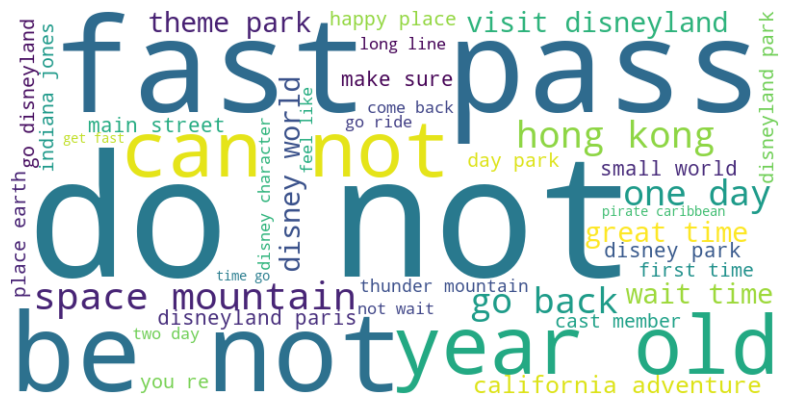

In [12]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(positive_top_40_bigrams))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
negative_top_40_bigrams = get_most_common_grams(train_negative_preproc['Review_Text'], 2, 40)

negative_top_40_bigrams

[('do not', 1549),
 ('fast pass', 615),
 ('be not', 544),
 ('disneyland paris', 455),
 ('can not', 418),
 ('year old', 398),
 ('go back', 305),
 ('theme park', 298),
 ('could not', 289),
 ('wait time', 274),
 ('visit disneyland', 247),
 ('ride close', 242),
 ('wait line', 240),
 ('cast member', 240),
 ('disney park', 235),
 ('many people', 231),
 ('space mountain', 225),
 ('will not', 214),
 ('disney world', 214),
 ('go disneyland', 195),
 ('get ride', 192),
 ('come back', 179),
 ('walk around', 174),
 ('hong kong', 169),
 ('ride break', 168),
 ('not get', 168),
 ('long line', 159),
 ('feel like', 155),
 ('around park', 154),
 ('disney character', 149),
 ('walt disney', 149),
 ('year ago', 148),
 ('thunder mountain', 146),
 ('would not', 145),
 ('not go', 144),
 ('happy place', 143),
 ('many ride', 142),
 ('minute wait', 141),
 ('place earth', 140),
 ('indiana jones', 139)]

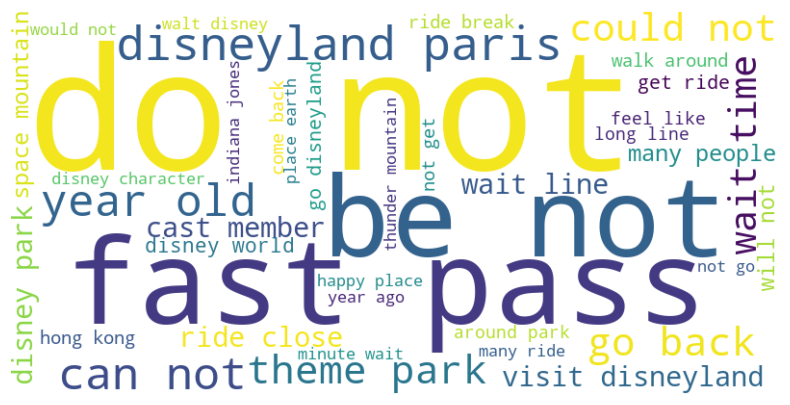

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(negative_top_40_bigrams))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
neutral_top_40_bigrams = get_most_common_grams(train_neutral_preproc['Review_Text'], 2, 40)

neutral_top_40_bigrams

[('do not', 1962),
 ('be not', 818),
 ('fast pass', 751),
 ('disneyland paris', 433),
 ('year old', 429),
 ('can not', 412),
 ('space mountain', 395),
 ('disney world', 388),
 ('hong kong', 357),
 ('disney park', 343),
 ('cast member', 328),
 ('go back', 326),
 ('theme park', 311),
 ('visit disneyland', 300),
 ('wait time', 272),
 ('ride close', 249),
 ('could not', 245),
 ('one day', 239),
 ('thunder mountain', 226),
 ('many ride', 223),
 ('you re', 204),
 ('go disneyland', 201),
 ('disney character', 201),
 ('will not', 200),
 ('indiana jones', 200),
 ('not get', 198),
 ('come back', 197),
 ('first time', 197),
 ('small world', 193),
 ('would not', 193),
 ('disneyland park', 188),
 ('long queue', 188),
 ('main street', 186),
 ('long line', 186),
 ('walk around', 184),
 ('feel like', 179),
 ('young child', 177),
 ('get ride', 172),
 ('california adventure', 169),
 ('year ago', 165)]

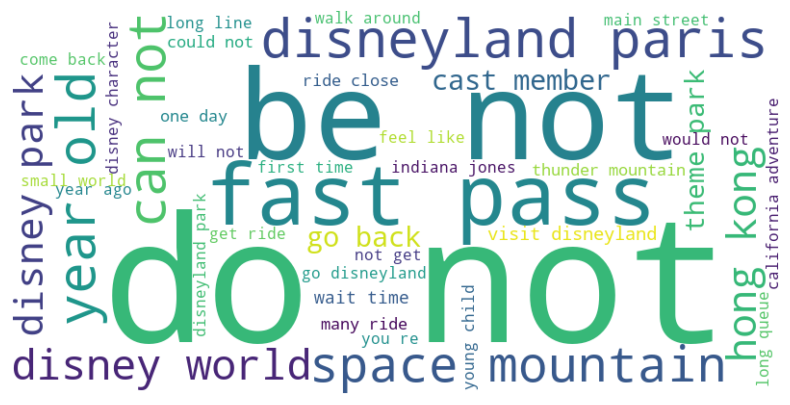

In [16]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(neutral_top_40_bigrams))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3-grams

In [17]:
positive_top_40_trigrams = get_most_common_grams(train_positive_preproc['Review_Text'], 3, 40)

positive_top_40_trigrams

[('happy place earth', 1012),
 ('get fast pass', 810),
 ('use fast pass', 782),
 ('can not wait', 668),
 ('hong kong disneyland', 636),
 ('big thunder mountain', 588),
 ('do not miss', 539),
 ('do not get', 468),
 ('do not know', 382),
 ('fast pass system', 382),
 ('day park hopper', 359),
 ('california adventure park', 340),
 ('year old daughter', 335),
 ('not wait go', 332),
 ('do not want', 329),
 ('disneyland california adventure', 326),
 ('stay disney hotel', 325),
 ('lion king show', 310),
 ('do not think', 295),
 ('wait go back', 294),
 ('be not bad', 287),
 ('toy story land', 286),
 ('walt disney studio', 273),
 ('do not go', 266),
 ('visit disneyland paris', 265),
 ('do not like', 264),
 ('ride do not', 264),
 ('disneyland hong kong', 260),
 ('indiana jones ride', 246),
 ('dream come true', 245),
 ('walt disney world', 244),
 ('park do not', 240),
 ('do not forget', 239),
 ('wait time ride', 236),
 ('fast pass ride', 232),
 ('ride space mountain', 231),
 ('make sure get', 227)

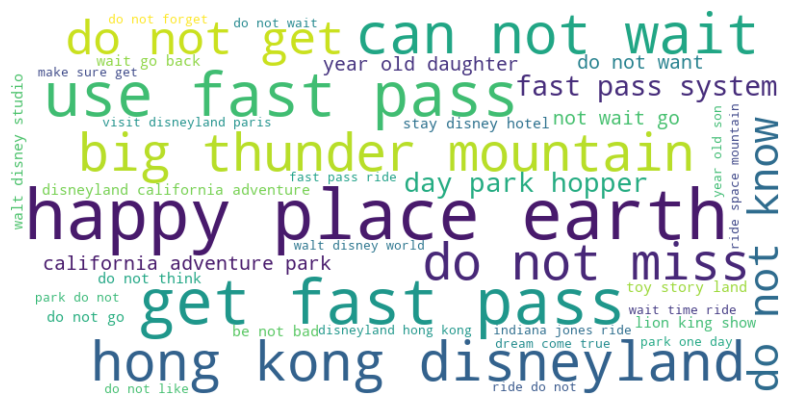

In [18]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(positive_top_40_trigrams))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
negative_top_40_trigrams = get_most_common_grams(train_negative_preproc['Review_Text'], 3, 40)

negative_top_40_trigrams

[('happy place earth', 119),
 ('do not know', 97),
 ('do not get', 80),
 ('visit disneyland paris', 73),
 ('do not think', 71),
 ('do not go', 68),
 ('get fast pass', 68),
 ('big thunder mountain', 64),
 ('do not want', 59),
 ('hong kong disneyland', 58),
 ('do not even', 56),
 ('character walk around', 53),
 ('do not expect', 51),
 ('walk around park', 47),
 ('save money go', 46),
 ('fast pass ticket', 46),
 ('do not bother', 45),
 ('do not care', 45),
 ('year old daughter', 44),
 ('park do not', 43),
 ('do not waste', 41),
 ('do not see', 40),
 ('go disneyland paris', 39),
 ('never go back', 39),
 ('walt disney world', 38),
 ('fast pass system', 37),
 ('do not seem', 37),
 ('ride fast pass', 36),
 ('day park hopper', 36),
 ('disney world florida', 36),
 ('waste time money', 35),
 ('indiana jones ride', 35),
 ('many people park', 34),
 ('wait time ride', 34),
 ('really do not', 33),
 ('ride do not', 33),
 ('go back hotel', 32),
 ('can not get', 32),
 ('could not get', 32),
 ('do not w

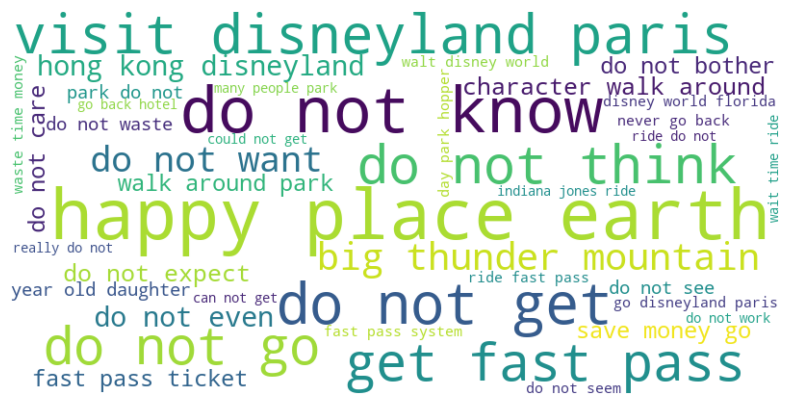

In [20]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(negative_top_40_trigrams))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
neutral_top_40_trigrams = get_most_common_grams(train_neutral_preproc['Review_Text'], 3, 40)

neutral_top_40_trigrams

[('do not get', 124),
 ('do not know', 105),
 ('do not think', 101),
 ('big thunder mountain', 100),
 ('get fast pass', 91),
 ('hong kong disneyland', 86),
 ('visit disneyland paris', 82),
 ('happy place earth', 82),
 ('do not want', 77),
 ('do not seem', 73),
 ('walt disney world', 67),
 ('disney world florida', 58),
 ('do not like', 58),
 ('character walk around', 57),
 ('do not see', 55),
 ('fast pass system', 54),
 ('use fast pass', 54),
 ('do not go', 53),
 ('park do not', 51),
 ('stay disney hotel', 51),
 ('lion king show', 50),
 ('do not even', 49),
 ('disneyland hong kong', 49),
 ('ride do not', 48),
 ('do not bother', 47),
 ('indiana jones ride', 47),
 ('do not feel', 46),
 ('ride be not', 45),
 ('park be not', 45),
 ('walk around park', 42),
 ('do not expect', 42),
 ('california adventure park', 41),
 ('ride space mountain', 41),
 ('walt disney studio', 40),
 ('do not really', 40),
 ('will not go', 39),
 ('many ride close', 38),
 ('year old daughter', 37),
 ('be not much', 37

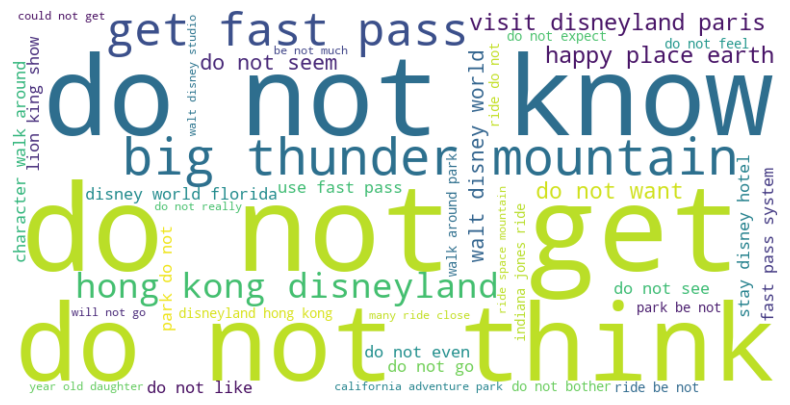

In [22]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(neutral_top_40_trigrams))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 4-Grams

In [23]:
positive_top_40_quadgrams = get_most_common_grams(train_positive_preproc['Review_Text'], 4, 40)

positive_top_40_quadgrams

[('can not wait go', 332),
 ('not wait go back', 263),
 ('day park hopper pass', 120),
 ('use fast pass system', 116),
 ('truly happy place earth', 112),
 ('visit hong kong disneyland', 104),
 ('take advantage fast pass', 102),
 ('really happy place earth', 86),
 ('do not wait long', 85),
 ('big thunder mountain railroad', 83),
 ('year old year old', 81),
 ('disneyland happy place earth', 78),
 ('space mountain indiana jones', 75),
 ('can not wait return', 71),
 ('day park hopper ticket', 70),
 ('disneyland california adventure park', 68),
 ('big grizzly mountain runaway', 67),
 ('get fast pass ride', 66),
 ('mountain runaway mine car', 65),
 ('fast pass popular ride', 64),
 ('grizzly mountain runaway mine', 64),
 ('walt disney studio park', 63),
 ('mr toads wild ride', 63),
 ('mountain big thunder mountain', 62),
 ('do not get see', 57),
 ('do not miss parade', 56),
 ('stay one disney hotel', 53),
 ('make use fast pass', 53),
 ('buzz lightyear laser blast', 52),
 ('ride big thunder mo

(-0.5, 799.5, 399.5, -0.5)

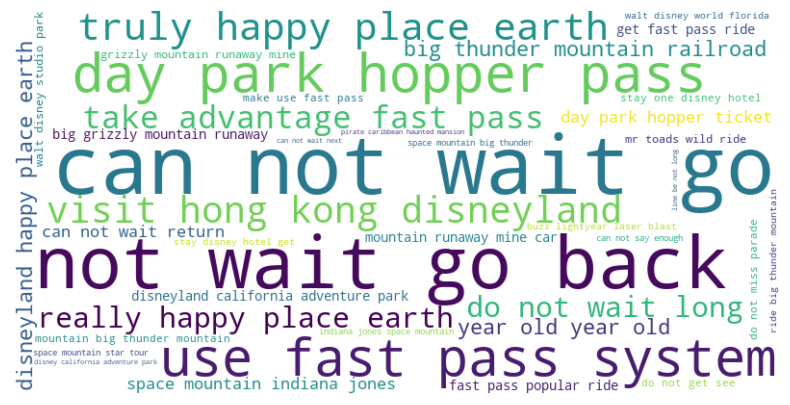

In [24]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(positive_top_40_quadgrams))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [25]:
negative_top_40_quadgrams = get_most_common_grams(train_negative_preproc['Review_Text'], 4, 40)

negative_top_40_quadgrams

[('do not waste time', 23),
 ('will not go back', 16),
 ('do not waste money', 16),
 ('disney character walk around', 14),
 ('save money go florida', 13),
 ('would never go back', 12),
 ('character walk around park', 11),
 ('do not want go', 11),
 ('year old year old', 10),
 ('space mountain indiana jones', 10),
 ('buzz light year ride', 9),
 ('visit hong kong disneyland', 9),
 ('would not go back', 9),
 ('day park hopper ticket', 9),
 ('ride close due technical', 9),
 ('could not wait get', 9),
 ('day park hopper pass', 8),
 ('see character walk around', 8),
 ('do not get wrong', 8),
 ('one day park hopper', 7),
 ('buffalo bill wild west', 7),
 ('really do not want', 7),
 ('do not speak english', 7),
 ('go back hotel swim', 7),
 ('do not get ride', 7),
 ('do not think go', 7),
 ('close due technical issue', 7),
 ('stay one disney hotel', 7),
 ('walt disney world florida', 7),
 ('look like have not', 6),
 ('like do not want', 6),
 ('walt disney studio park', 6),
 ('park do not open', 6

(-0.5, 799.5, 399.5, -0.5)

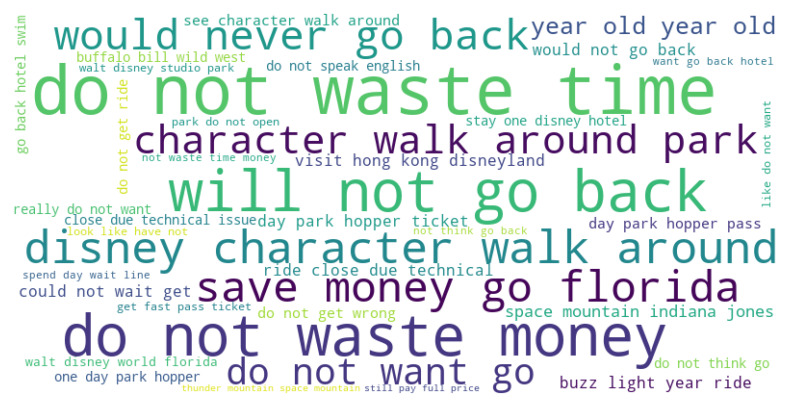

In [26]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(negative_top_40_quadgrams))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [27]:
neutral_top_40_quadgrams = get_most_common_grams(train_neutral_preproc['Review_Text'], 4, 40)

neutral_top_40_quadgrams

[('do not get wrong', 31),
 ('will not go back', 25),
 ('walt disney world florida', 19),
 ('disney character walk around', 19),
 ('fast pass do not', 16),
 ('character walk around park', 15),
 ('big thunder mountain railroad', 15),
 ('visit hong kong disneyland', 15),
 ('year old year old', 14),
 ('will not rush back', 13),
 ('stay new york hotel', 12),
 ('visit walt disney world', 11),
 ('do not waste time', 11),
 ('do not think would', 11),
 ('cast member do not', 11),
 ('mountain big thunder mountain', 11),
 ('disney california adventure park', 10),
 ('day park hopper ticket', 10),
 ('hong kong disneyland small', 10),
 ('do not get see', 10),
 ('would not go back', 9),
 ('disney park around world', 9),
 ('see character walk around', 9),
 ('visit disneyland hong kong', 9),
 ('get fast pass ticket', 9),
 ('walt disney studio park', 9),
 ('disney world many time', 9),
 ('thunder mountain space mountain', 9),
 ('stay davy crockett ranch', 8),
 ('stay disney hotel get', 8),
 ('get fast 

(-0.5, 799.5, 399.5, -0.5)

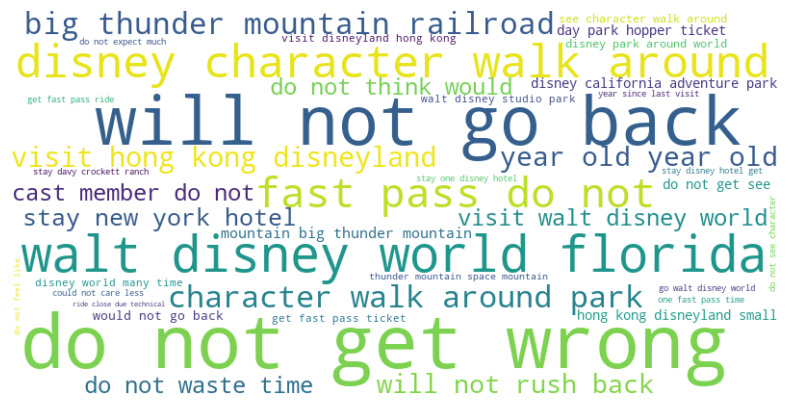

In [28]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(neutral_top_40_quadgrams))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')